In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=torch.linspace(1,50,50).reshape(-1,1)

In [6]:
torch.manual_seed(71)
e=torch.randint(-8,9,(50,1),dtype=torch.float)

SRIDHARSHAN D (212223040205)

In [11]:
y = 2*x + 1 + e
print(y.shape)

torch.Size([50, 1])


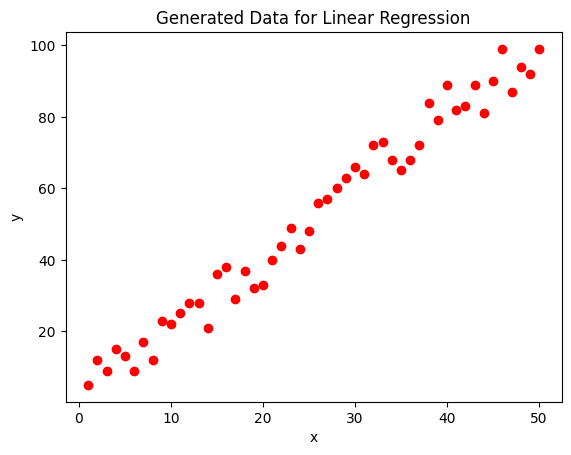

In [13]:
plt.scatter(x.numpy(), y.numpy(),color='red')  # Scatter plot of data points
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [14]:
torch.manual_seed(59)
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [15]:
torch.manual_seed(59)
model = Model(1, 1)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [16]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [17]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [19]:
epochs = 50
losses = []
for epoch in range(1, epochs + 1):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')

epoch:  1  loss: 3057.21679688  weight: 0.42887032  bias: 0.97346288
epoch:  2  loss: 2103.35449219  weight: 0.69627261  bias: 0.98148096
epoch:  3  loss: 1449.16748047  weight: 0.91772103  bias: 0.98813367
epoch:  4  loss: 1000.50634766  weight: 1.10111284  bias: 0.99365568
epoch:  5  loss: 692.80102539  weight: 1.25298810  bias: 0.99824125
epoch:  6  loss: 481.76757812  weight: 1.37876296  bias: 1.00205135
epoch:  7  loss: 337.03448486  weight: 1.48292291  bias: 1.00521922
epoch:  8  loss: 237.77218628  weight: 1.56918240  bias: 1.00785530
epoch:  9  loss: 169.69511414  weight: 1.64061773  bias: 1.01005089
epoch: 10  loss: 123.00582123  weight: 1.69977641  bias: 1.01188171
epoch: 11  loss: 90.98486328  weight: 1.74876821  bias: 1.01341045
epoch: 12  loss: 69.02390289  weight: 1.78934026  bias: 1.01468909
epoch: 13  loss: 53.96244812  weight: 1.82293963  bias: 1.01576054
epoch: 14  loss: 43.63278198  weight: 1.85076451  bias: 1.01666045
epoch: 15  loss: 36.54840851  weight: 1.87380731

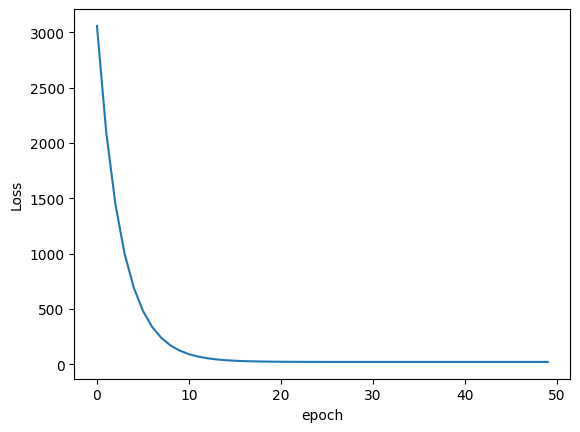

In [20]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
plt.show()

In [23]:
x1 = torch.tensor([x.min().item(),x.max().item()])
w1, b1 = model.linear.weight.item(), model.linear.bias.item()
y1 = x1 * w1 + b1

In [24]:
print(f'Final Weight: {w1:.8f}, Final Bias: {b1:.8f}')
print(f'X range: {x1.numpy()}')
print(f'Predicted Y values: {y1.numpy()}')

Final Weight: 1.98463321, Final Bias: 1.02326834
X range: [ 1. 50.]
Predicted Y values: [  3.0079017 100.25493  ]


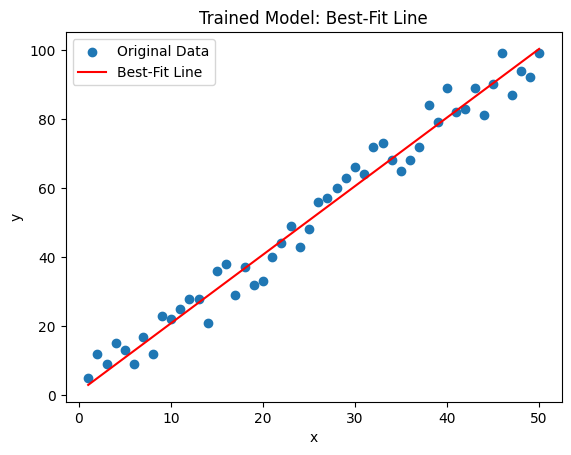

In [26]:
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x1.numpy(), y1.numpy(), 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()